## Hard level array problems

### Pascal triangle
In Pascal's triangle, each number is the sum of the two numbers directly above it as shown  
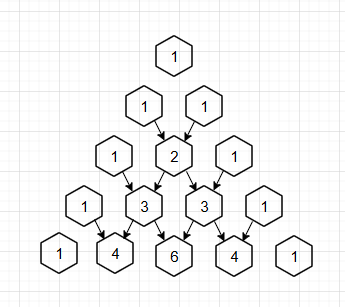   

#### Finding element at given row and column
Like row = 5, col = 3, the element at that place is 6.  

To get the element use combination of row-1 and col-1: <sup>row-1</sup>C<sub>col-1</sub>  
<sup>row-1</sup>C<sub>col-1</sub> = (row-1)! / (col-1)! * ((row-1)-(col-1))!

In [8]:
import math
row = 5
col = 3
a = math.factorial(row-1) // (math.factorial(col-1) * math.factorial((row-1)-(col-1)))
print(a)

6


In [ ]:
# Short cut to find combination
def nCr(n,r):
    res = 1
    for i in range(r):
        res = res * (n-i)
        res = res / (i+1)
    return res
row = 5
col = 3
ans = nCr(row-1,col-1)
print(int(ans))
# Time complexity: O(r)

6


#### Print entire row
Consider the row we have to print is 4th  
row -> 1 3 3 1

- nth row will have n elements  
- print entire, column will go from 1 -> row.no

In [ ]:
r = 4
for i in range(1,r+1):
    print(int(nCr(r-1,i-1)),end=" ")

# Time complexity is O(nxr)

1 3 3 1 

Use 0 based indexing for each column  
Start with ans = 1, then each element of the row can be obtained by  
ele = ans x ((row-col)/col)  
Update ans = ele every time 

In [2]:
r = 4
ans = 1
print(ans,end=" ")
for i in range(1,r):
    ele = int(ans * ((r-i)/i))
    print(ele, end=" ")
    ans = ele

1 3 3 1 

#### Print full pascal triangle
Print all rows from 1 -> n

In [7]:
n = 6
ans = []
for i in range(1,n+1):
    temp = []
    t = 1
    temp.append(t)
    for j in range(1,i):
        ele = int(t * ((i-j)/j))
        temp.append(ele)
        t = ele
    ans.append(temp)
for i in ans:
    print(i)

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]


### Majority element (more than n/3 times)
Consider array [1,1,1,3,3,2,2,2]  
n = 8, math.floor(8/3) ~ 2 times  
elements appearing more than 2 times are [1,2]  

There will always at max 2 elements will be appear n/3 times  
Because,  
n = 8, math.floor(8/3) ~ 2 times (element should appear atleast 3 times)  
If 3 elements appear 3 times, 3+3+3 = 9, but there are only 8 elements,  
so at max only 2 elements will appear n/3 times, and at minimum 0 elements will appear more than n/3 times

In [ ]:
# Brute force: Count each element
import math
arr = [1,1,1,3,3,2,2,2]
n = len(arr)
me = []
for i in range(n):
    c = 0
    for j in range(n):
        if arr[j] == arr[i]:
            c+=1
    if c > math.floor(n/3) and arr[i] not in me:
        me.append(arr[i])
print(me)
# Time complexity: O(n^2)
# Space complexity: O(1)

[1, 2]


In [14]:
import math
arr = [1,1,1,3,3,2,2,2]
ans = []
n = len(arr)
for i in range(n):
    if len(ans)==0 or ans[0]!=arr[i]:
        # If no majority element or existing majority element is already appeared
        c = 0
        for j in range(n):
            if arr[j]==arr[i]:
                c+=1
        if c > math.floor(n/3):
            ans.append(arr[i])
        if len(ans) == 2:
            # At max only 2 majority elements
            break
print(ans)
# Time complexity in worst case scenario is O(n^2)
# Space complexity: O(1)

[1, 2]


In [ ]:
# Using hash map: Remember each element count as key-value pair
d = {}
me = []
for i in range(n):
    if arr[i] in d:
        d[arr[i]] +=1
    else:
        d[arr[i]] = 1
for i in d:
    if d[i] > math.floor(n/3):
        me.append(i)
print(me)
# Time complexity: O(n)
# Space complexity worst case scenario: O(n)

[1, 2]


Maintain the following variables  
c1 = 0, e1 = 0
c2 = 0, e2 = 0

If count of both is 0 we assume that the majority is that element.

Start looping from 0 -> n-1, if same element appears increase the count or else decrease the count by 1.

In [ ]:
# Optiimal solution: Moore voting algorithm
c1,c2,e1,e2 = 0,0,0,0
for i in range(n):
    if c1 == 0 and arr[i]!=e2:
        c1 = 1
        e1 = arr[i]
    elif c2 == 0 and arr[i]!=e1:
        c2 = 1
        e2 = arr[i]
    elif arr[i] == e1:
        c1+=1
    elif arr[i] == e2:
        c2+=1
    else:
        c1-=1
        c2-=1
print(e1,e2)

# Manual check if the suppose to be elements are actual manual elements
mc1, mc2 = 0, 0
for i in range(n):
    if arr[i] == e1:
        mc1 += 1
    elif arr[i] == e2:
        mc2 += 1
if mc1 > math.floor(n/3) and mc2 > math.floor(n/3):
    print(e1,e2)

# Time complexity: O(2n)
# Space complexity: O(1)

1 2
1 2
